# Лабораторная работа 3. Итеративные и рекурсивные алгоритмы

### Вариант 19

**Цель работы:** изучить рекурсивные алгоритмы и рекурсивные структуры данных; научиться проводить анализ итеративных и рекурсивных процедур; исследовать эффективность итеративных и  рекурсивных процедур при реализации на ПЭВМ.

In [55]:
import time
import pylab
import numpy

### **Задача:**

1.  Функция  $f(n)$ определена  для целых следующим образом:
$$ f(n) =  
\left\{
  \begin{array}{ll}
    1, & \text{если} n = 1,\\
    \sum\limits_{i=2}^n f(n \; div \; i), & \text{если} n \geq 2.\\
  \end{array}
\right.$$

### Реализация алгоритма

In [41]:
def f_r(n):
    if n == 1:
        return 1
    else:
        s = 0  
        for i in range(2, n+1):
            s += f_r(n // i)
        return s
print(f_r(6))

6


### Псевдокод

In [ ]:
если n == 1
    вернуть 1
иначе 
    для i от 2 до n
        сумма += функция(n // i)
    вернуть сумму

### Тесты

In [88]:
assert f_r(1) == 1, "Ошибка при n = 1"
assert f_r(27) == 68, "Ошибка при вычислении суммы"

## Задание 2

### Реализация функции без рекурсии

In [42]:
def f_wr(n):
    result = {1: 1}
    for i in range(2, n+1):
        s = 0
        for j in range(2, i+1):
            s += result[i // j]
        result[i] = s
    return result[n]

f_wr(27)

68

## Задание 3

![img](./rec.jpg)

### Оценка верхней границы

In [86]:
f_r(10**4)

1817299

In [85]:
f_wr(10**4)

1817299

In [87]:
f_r(10**5)

KeyboardInterrupt: 

In [ ]:
f_wr(10**5)

### Мемоизация

In [64]:
def memoized(func):
    cache = {}
    def wrapper(n):
        if n not in cache:
            cache[n] = func(n)
        return cache[n]
    return wrapper

@memoized
def function_m(n):
    if n == 1:
        return 1
    s = 0
    for i in range(2, n+1):
        s += f(n // i)
    return s
print(function_m(27))

68


In [65]:
cache = {}

def function(n):
    if n in cache:
        return cache[n]
    else:
        if n == 1:
            cache[1] = 1
            return 1
        s = 0
        for i in range(2, n+1):
            s += f(n // i)
        cache[n] = s
        return s
print(function(27))

68


### График

In [66]:
times_rec = {}
times_without_rec = {}
times_memo = {}

##### Рекурсивно

In [67]:
n = 50
start = time.time()

f_r(n)

end = time.time()
t = end * 10**6 - start * 10**6
times_rec[n] = t
print(t)

0.0


In [68]:
n = 500
start = time.time()

f_r(n)

end = time.time()
t = end * 10**6 - start * 10**6
times_rec[n] = t
print(t)

3988.5


In [69]:
n = 5000
start = time.time()

f_r(n)

end = time.time()
t = end * 10**6 - start * 10**6
times_rec[n] = t
print(t)

172537.25


##### Без рекурсии

In [70]:
n = 50
start = time.time()

f_wr(n)

end = time.time()
t = end * 10**6 - start * 10**6
times_without_rec[n] = t
print(t)

0.0


In [71]:
n = 500
start = time.time()

f_wr(n)

end = time.time()
t = end * 10**6 - start * 10**6
times_without_rec[n] = t
print(t)

12000.0


In [72]:
n = 5000
start = time.time()

f_wr(n)

end = time.time()
t = end * 10**6 - start * 10**6
times_without_rec[n] = t
print(t)

1308503.0


##### Memoized

In [73]:
n = 50
start = time.time()

function_m(n)

end = time.time()
t = end * 10**6 - start * 10**6
times_memo[n] = t
print(t)

997.75


In [74]:
n = 500
start = time.time()

function_m(n)

end = time.time()
t = end * 10**6 - start * 10**6
times_memo[n] = t
print(t)

16962.25


In [75]:
n = 5000
start = time.time()

function_m(n)

end = time.time()
t = end * 10**6 - start * 10**6
times_memo[n] = t
print(t)

637294.5


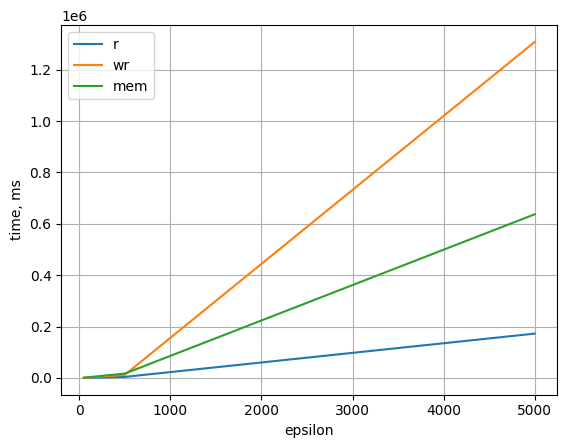

In [82]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(times_rec.keys(), times_rec.values(), times_without_rec.keys(), times_without_rec.values(), times_memo.keys(), times_memo.values())
plt.legend(["r", "wr", "mem"])
plt.ylabel('time, ms')
plt.xlabel('epsilon')
plt.grid(True)
plt.show()